# Предсказать лучшее упражнение 

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('megaGymDataset.csv') 

In [3]:
df.head() 

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head() 

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2918 non-null   object 
 1   Desc        1368 non-null   object 
 2   Type        2918 non-null   object 
 3   BodyPart    2918 non-null   object 
 4   Equipment   2886 non-null   object 
 5   Level       2918 non-null   object 
 6   Rating      1031 non-null   float64
 7   RatingDesc  862 non-null    object 
dtypes: float64(1), object(7)
memory usage: 182.5+ KB


Title - название упражнения 

Desc - техника выполнения задания

Type - тип тренировки

BodyPart - часть тела

Equipment - снаряжение

Level - уровень выполнения

Rating - рейтинг

RatingDesc - рейтинг техники выполнения

In [7]:
print(f"Полностью: {df.shape}")
print(f"Кол-во строк: {df.shape[0]}")
print(f"Кол-во столбцов: {df.shape[1]}")

Полностью: (2918, 8)
Кол-во строк: 2918
Кол-во столбцов: 8


In [8]:
df.head(2918).T

,0,1,2,3,4,5,6,7,8,9,...,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917
Title,Partner plank band row,Banded crunch isometric hold,FYR Banded Plank Jack,Banded crunch,Crunch,Decline band press sit-up,FYR2 Banded Frog Pump,Band low-to-high twist,Barbell roll-out,Barbell Ab Rollout - On Knees,...,30 Arms Close-Grip Push-Up,30 Arms BFR Close-Grip Push-Up,Supine Chest Throw,Decline EZ-bar skullcrusher,EZ-Bar Skullcrusher,EZ-bar skullcrusher-,Lying Close-Grip Barbell Triceps Press To Chin,EZ-Bar Skullcrusher - Gethin Variation,TBS Skullcrusher,30 Arms EZ-Bar Skullcrusher
Desc,The partner plank band row is an abdominal exe...,The banded crunch isometric hold is an exercis...,The banded plank jack is a variation on the pl...,The banded crunch is an exercise targeting the...,The crunch is a popular core exercise targetin...,The decline band press sit-up is a weighted co...,NaN,The band low-to-high twist is a core exercise ...,The barbell roll-out is an abdominal exercise ...,The barbell roll-out is an abdominal exercise ...,...,NaN,NaN,NaN,The decline EZ-bar skullcrusher is a popular e...,The EZ-bar skullcrusher is a popular exercise ...,The EZ-bar skullcrusher is a popular exercise ...,NaN,The EZ-bar skullcrusher is a popular exercise ...,The EZ-bar skullcrusher is a popular exercise ...,NaN
Type,Strength,Strength,Strength,Strength,Strength,Strength,Strength,Strength,Strength,Strength,...,Strength,Strength,Plyometrics,Strength,Strength,Strength,Strength,Strength,Strength,Strength
BodyPart,Abdominals,Abdominals,Abdominals,Abdominals,Abdominals,Abdominals,Abdominals,Abdominals,Abdominals,Abdominals,...,Triceps,Triceps,Triceps,Triceps,Triceps,Triceps,Triceps,Triceps,Triceps,Triceps
Equipment,Bands,Bands,Bands,Bands,Bands,Bands,Bands,Bands,Barbell,Barbell,...,Body Only,Body Only,Medicine Ball,E-Z Curl Bar,E-Z Curl Bar,E-Z Curl Bar,E-Z Curl Bar,E-Z Curl Bar,E-Z Curl Bar,E-Z Curl Bar
Level,Intermediate,Intermediate,Intermediate,Intermediate,Intermediate,Intermediate,Intermediate,Intermediate,Intermediate,Intermediate,...,Intermediate,Intermediate,Beginner,Intermediate,Intermediate,Intermediate,Beginner,Intermediate,Intermediate,Intermediate
Rating,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.9,8.9,...,NaN,NaN,8.2,9.3,9.0,8.1,8.1,NaN,NaN,NaN
RatingDesc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Average,Average,...,NaN,NaN,Average,Average,Average,Average,Average,NaN,NaN,NaN


In [9]:
df.head()

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2918 non-null   object 
 1   Desc        1368 non-null   object 
 2   Type        2918 non-null   object 
 3   BodyPart    2918 non-null   object 
 4   Equipment   2886 non-null   object 
 5   Level       2918 non-null   object 
 6   Rating      1031 non-null   float64
 7   RatingDesc  862 non-null    object 
dtypes: float64(1), object(7)
memory usage: 182.5+ KB


In [11]:
df['Title'].unique()

array(['Partner plank band row', 'Banded crunch isometric hold',
       'FYR Banded Plank Jack', ...,
       'EZ-Bar Skullcrusher - Gethin Variation', 'TBS Skullcrusher',
       '30 Arms EZ-Bar Skullcrusher'], dtype=object)

In [12]:
df['Desc'].unique()

array(['The partner plank band row is an abdominal exercise where two partners perform single-arm planks while pulling on the opposite ends of an exercise band. This technique can be done for time or reps in any ab-focused workout.',
       'The banded crunch isometric hold is an exercise targeting the abdominal muscles, particularly the rectus abdominis or "six-pack" muscles. The band adds resistance and continuous tension to this popular exercise.',
       'The banded plank jack is a variation on the plank that involves moving the legs in and out for repetitions. Having a band around the thighs forces the lower body to work harder, particularly the hips and glutes. The plank jack is commonly performed as part of a bodyweight circuit, or as part of a dynamic warm-up.',
       ...,
       'The bench dip is a highly effective exercise for building the triceps. The resistance comes from the body itself, rather than added weight.',
       'The decline EZ-bar skullcrusher is a popular exer

In [13]:
df['Type'].unique()

array(['Strength', 'Plyometrics', 'Cardio', 'Stretching', 'Powerlifting',
       'Strongman', 'Olympic Weightlifting'], dtype=object)

In [14]:
df['BodyPart'].unique()

array(['Abdominals', 'Adductors', 'Abductors', 'Biceps', 'Calves',
       'Chest', 'Forearms', 'Glutes', 'Hamstrings', 'Lats', 'Lower Back',
       'Middle Back', 'Traps', 'Neck', 'Quadriceps', 'Shoulders',
       'Triceps'], dtype=object)

In [15]:
df['Equipment'].unique()

array(['Bands', 'Barbell', 'Kettlebells', 'Dumbbell', 'Other', 'Cable',
       'Machine', 'Body Only', 'Medicine Ball', nan, 'Exercise Ball',
       'Foam Roll', 'E-Z Curl Bar'], dtype=object)

In [16]:
df['Level'].unique()

array(['Intermediate', 'Beginner', 'Expert'], dtype=object)

In [17]:
df['RatingDesc'].unique()

array([nan, 'Average'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Title'] = le.fit_transform(df['Title'])
df['Type'] = le.fit_transform(df['Type'])
df['BodyPart'] = le.fit_transform(df['BodyPart'])
df['Level'] = le.fit_transform(df['Level'])


df['Desc'] = le.fit_transform(df['Desc'])
df['Equipment'] = le.fit_transform(df['Equipment'])
df['RatingDesc'] = le.fit_transform(df['RatingDesc'])

In [19]:
df['Desc'].unique()

array([696, 139, 143, ..., 200, 301,  36])

In [20]:
df['Equipment'].unique()

array([ 0,  1,  8,  4, 11,  3,  9,  2, 10, 12,  6,  7,  5])

In [21]:
df['RatingDesc'].unique()

array([1, 0])

In [22]:
df.isnull().sum()

Title            0
Desc             0
Type             0
BodyPart         0
Equipment        0
Level            0
Rating        1887
RatingDesc       0
dtype: int64

In [23]:
df.isnull().sum() / df.shape[0] * 100

Title          0.000000
Desc           0.000000
Type           0.000000
BodyPart       0.000000
Equipment      0.000000
Level          0.000000
Rating        64.667581
RatingDesc     0.000000
dtype: float64

In [24]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
# df.fillna(0, inplace = True)

In [25]:
df.isnull().sum()

Title         0
Desc          0
Type          0
BodyPart      0
Equipment     0
Level         0
Rating        0
RatingDesc    0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2918 non-null   int32  
 1   Desc        2918 non-null   int32  
 2   Type        2918 non-null   int32  
 3   BodyPart    2918 non-null   int32  
 4   Equipment   2918 non-null   int32  
 5   Level       2918 non-null   int32  
 6   Rating      2918 non-null   float64
 7   RatingDesc  2918 non-null   int32  
dtypes: float64(1), int32(7)
memory usage: 102.7 KB


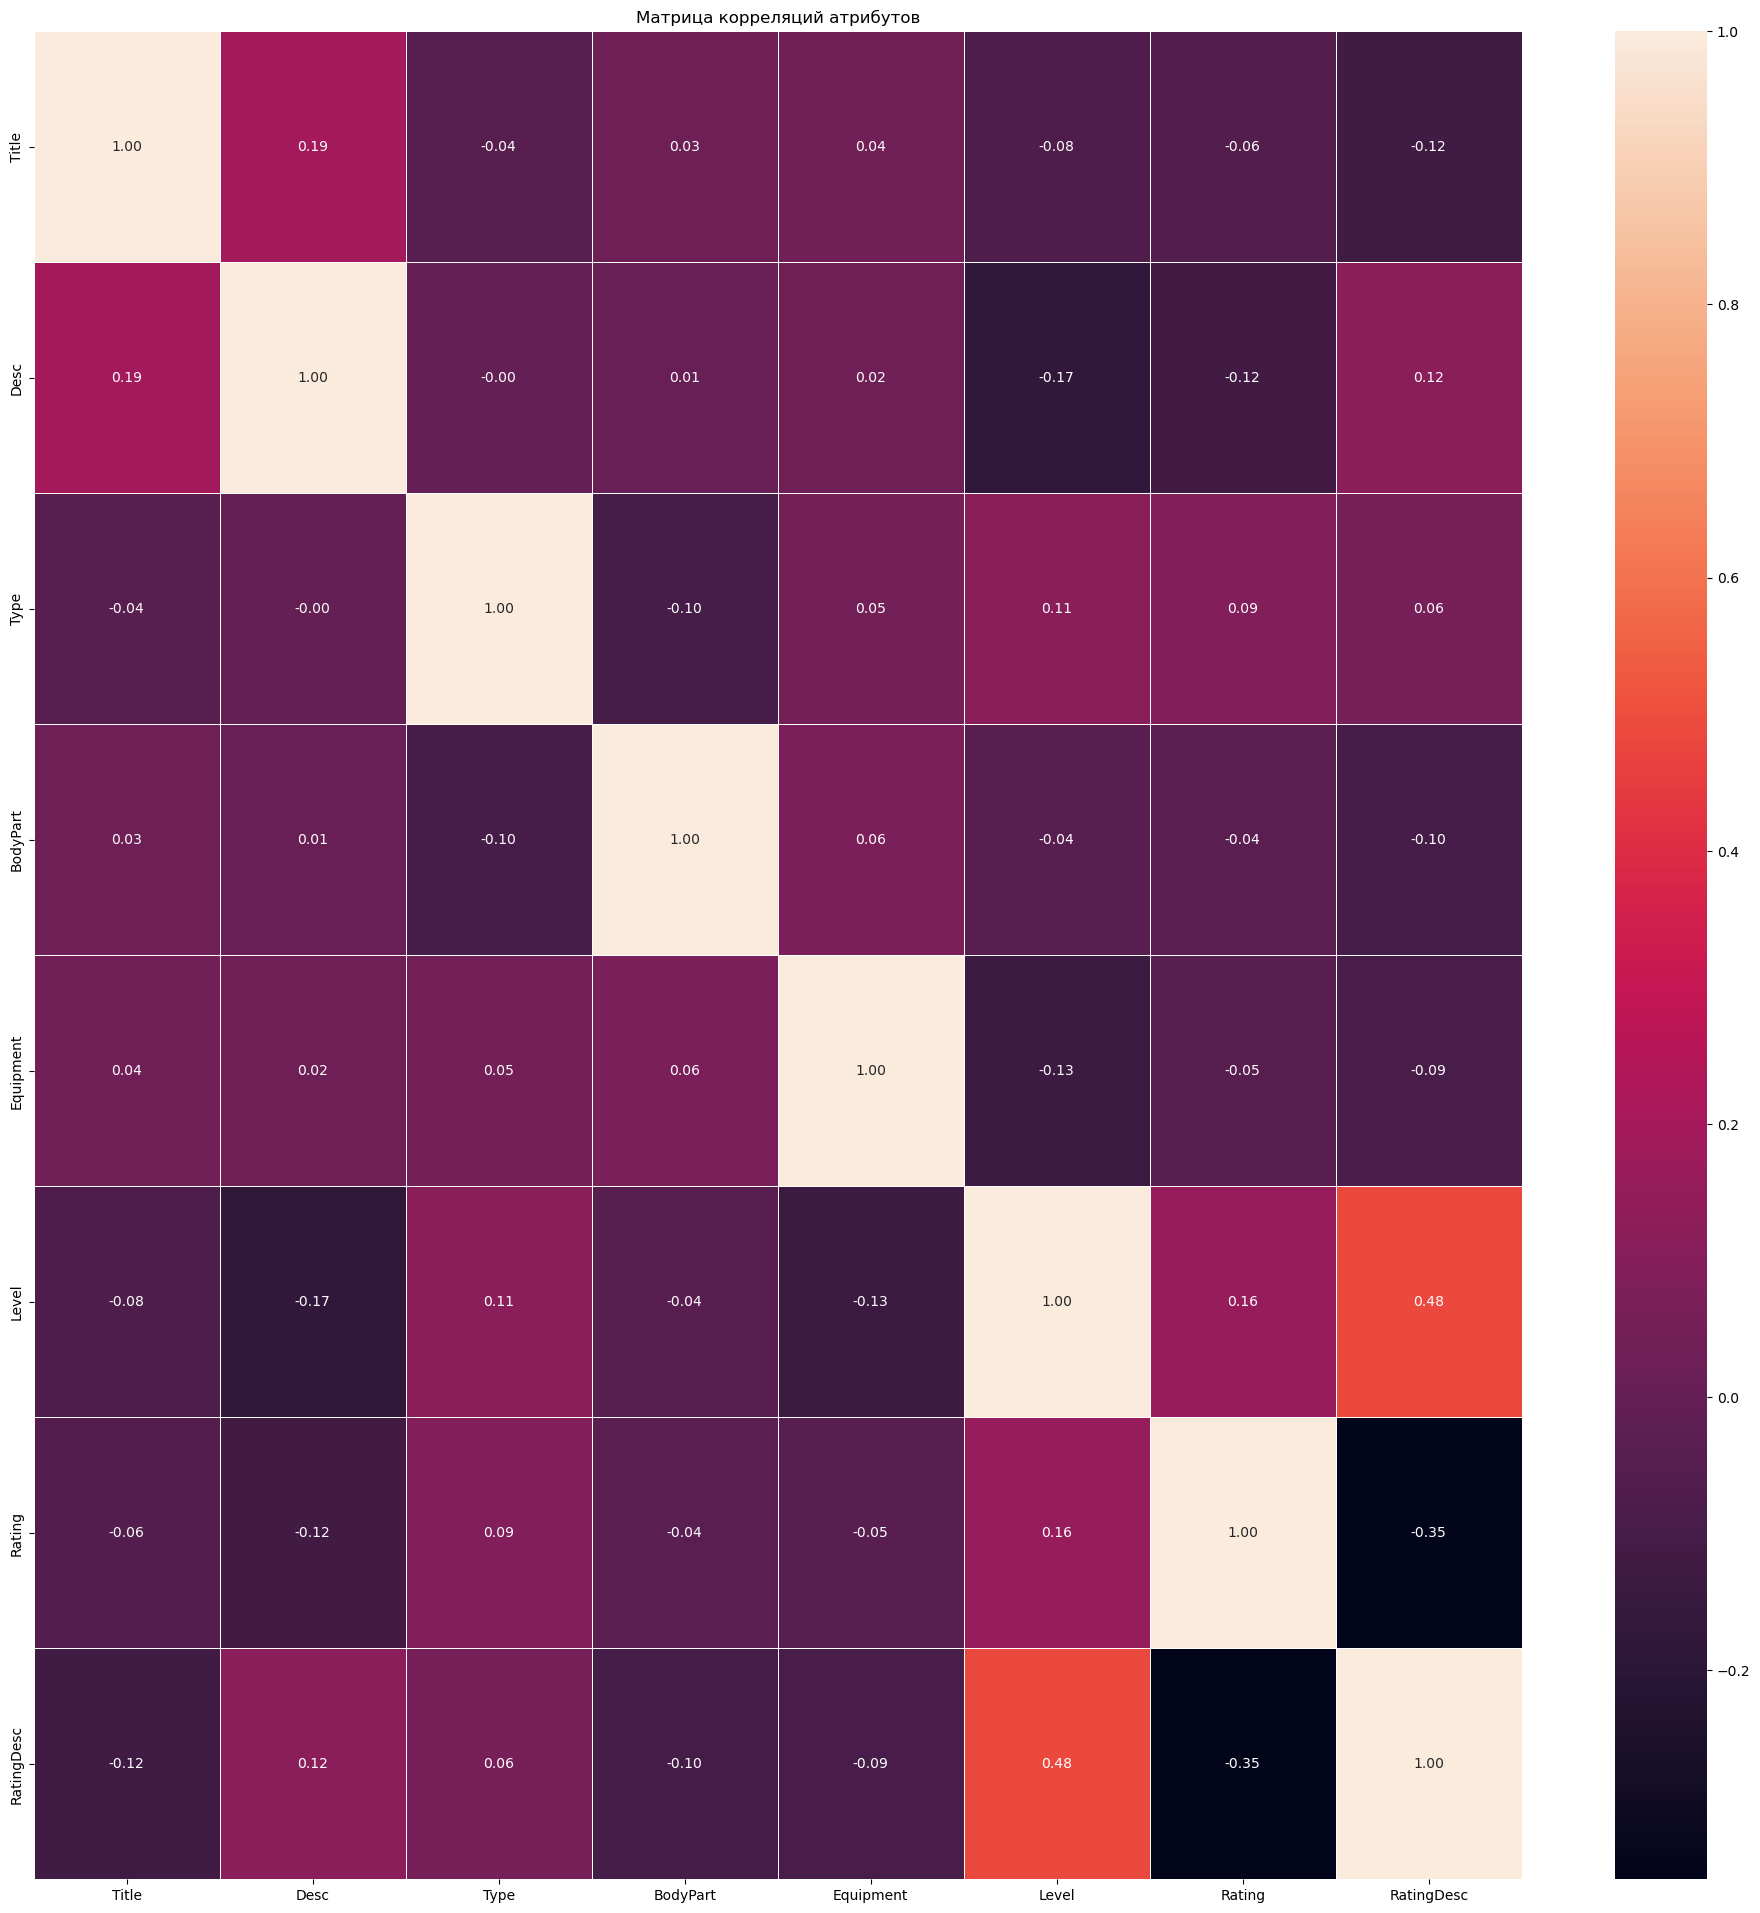

In [27]:
plt.figure(figsize=(24, 24))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций атрибутов')
plt.show()

In [28]:
df = df.drop('RatingDesc', axis=1)

In [29]:
df.head()

,Title,Desc,Type,BodyPart,Equipment,Level,Rating
0,2078,696,4,0,0,2,0.00000
1,323,139,4,0,0,2,5.91969
2,803,143,4,0,0,2,5.91969
3,322,138,4,0,0,2,5.91969
4,590,298,4,0,0,2,5.91969


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Title,2918.0,1452.893763,840.165323,0.0,725.25000,1452.50000,2181.75000,2908.0
Desc,2918.0,799.174092,337.317356,0.0,545.25000,1050.00000,1050.00000,1050.0
Type,2918.0,3.902330,0.718807,0.0,4.00000,4.00000,4.00000,6.0
BodyPart,2918.0,7.947910,5.629641,0.0,3.00000,9.00000,13.00000,16.0
Equipment,2918.0,4.078821,3.288227,0.0,2.00000,2.00000,4.00000,12.0
Level,2918.0,1.680946,0.729411,0.0,2.00000,2.00000,2.00000,2.0
Rating,2918.0,5.919690,2.130061,0.0,5.91969,5.91969,5.91969,9.6


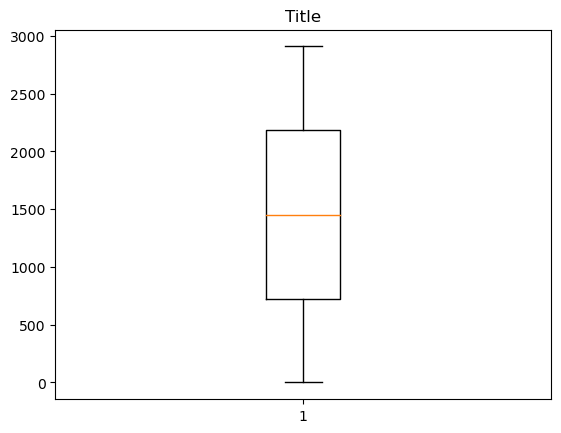

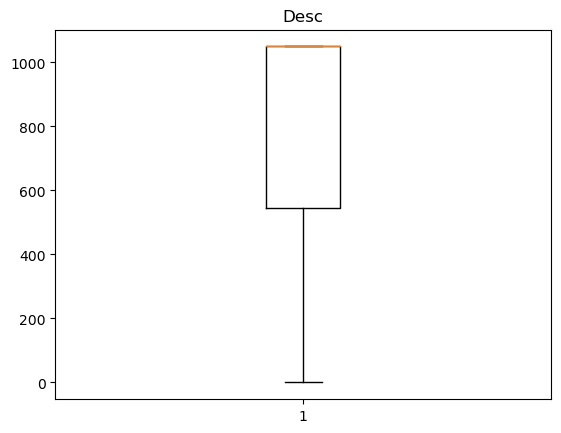

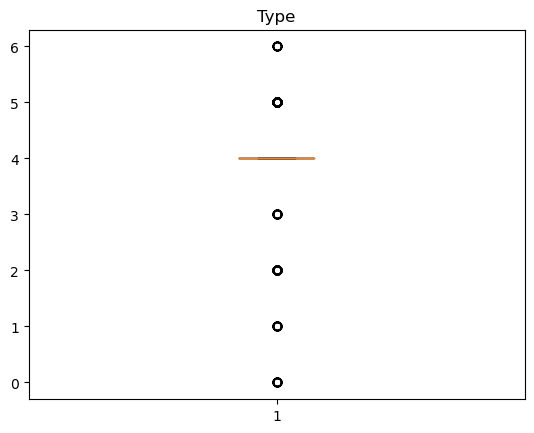

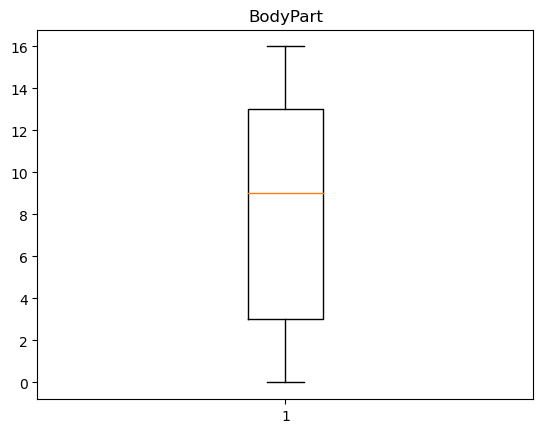

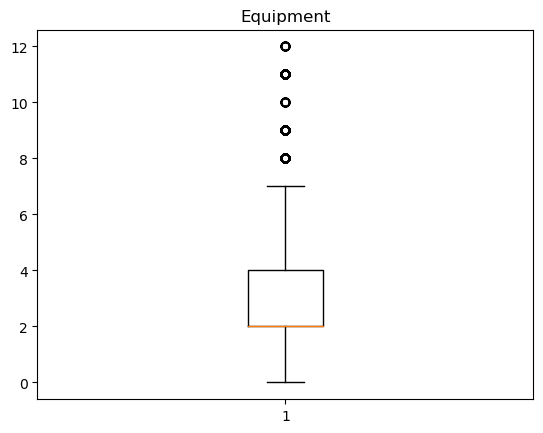

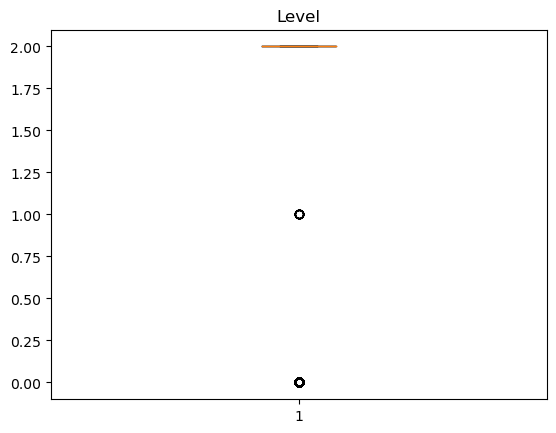

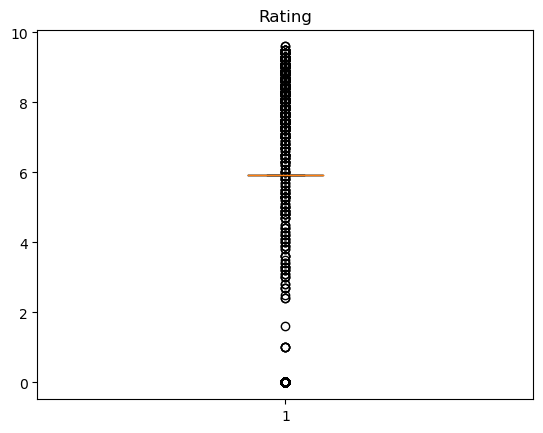

In [31]:
dataCheck = df.describe()

for i in dataCheck.columns:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

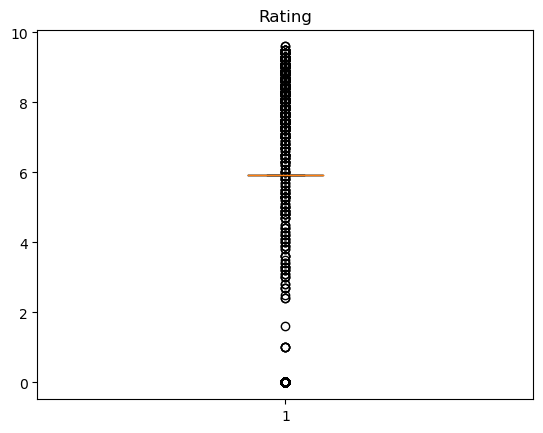

In [32]:
plt.boxplot(df['Rating'])
plt.title('Rating')
plt.show()

In [33]:
print(f"Количество записей:{len( df [ df['Rating'] < 2 ])}")

Количество записей:249


In [34]:
df.drop(index=df[df['Rating'] < 2].index, inplace=True)

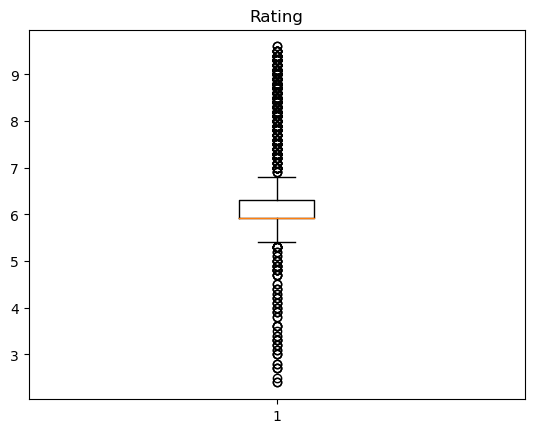

In [35]:
plt.boxplot(df['Rating'])
plt.title('Rating')
plt.show()

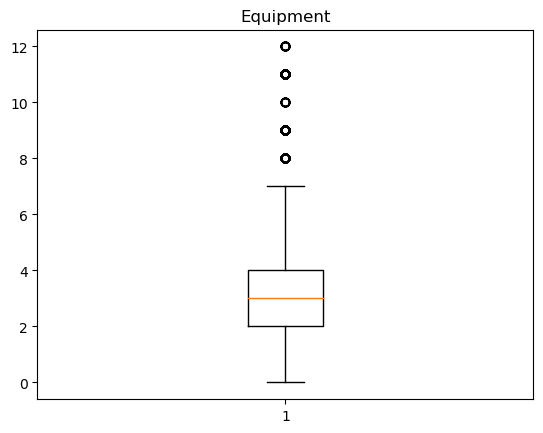

In [36]:
plt.boxplot(df['Equipment'])
plt.title('Equipment')
plt.show()

In [37]:
for i in range(7, 13, 1):
    print(f"Количество записей {i}: {len(df[df['Equipment'] > i])}")

Количество записей 7: 559
Количество записей 8: 430
Количество записей 9: 257
Количество записей 10: 232
Количество записей 11: 29
Количество записей 12: 0


In [38]:
df.drop(index=df[df['Equipment'] > 9].index, inplace=True)

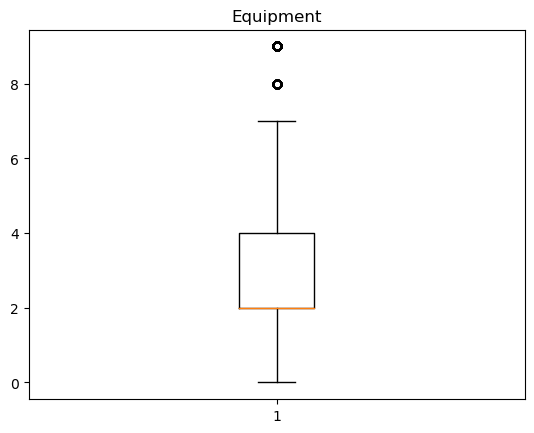

In [39]:
plt.boxplot(df['Equipment'])
plt.title('Equipment')
plt.show()

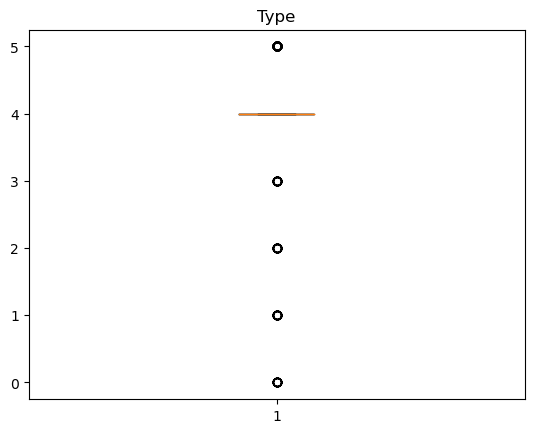

In [40]:
plt.boxplot(df['Type'])
plt.title('Type')
plt.show()

In [41]:
print(f"Количество записей:{len( df [ df['Type'] < 2 ])}")

Количество записей:42


In [42]:
df.drop(index=df[df['Type'] < 2].index, inplace=True)

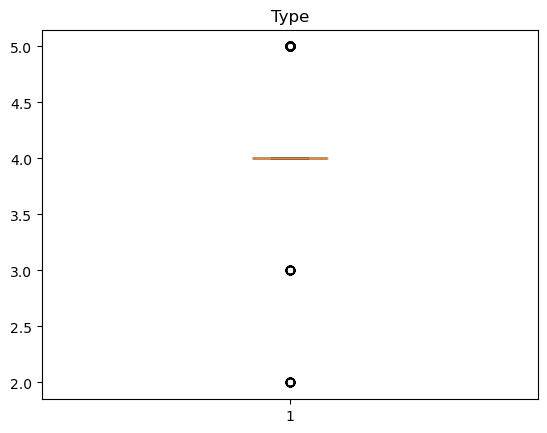

In [43]:
plt.boxplot(df['Type'])
plt.title('Type')
plt.show()

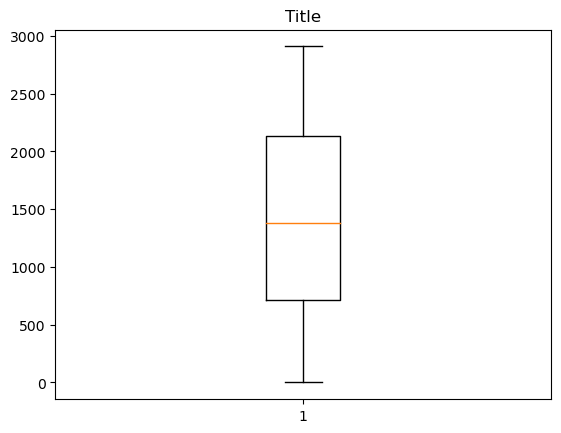

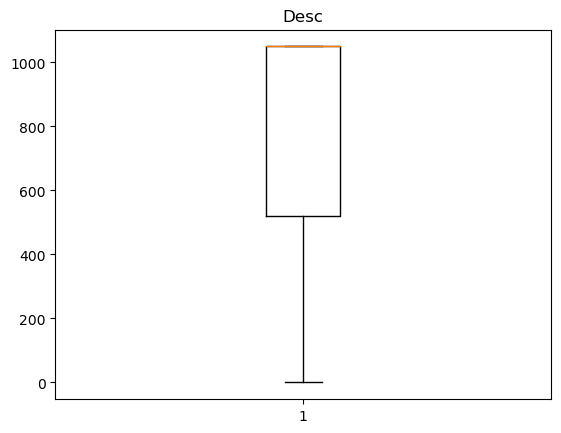

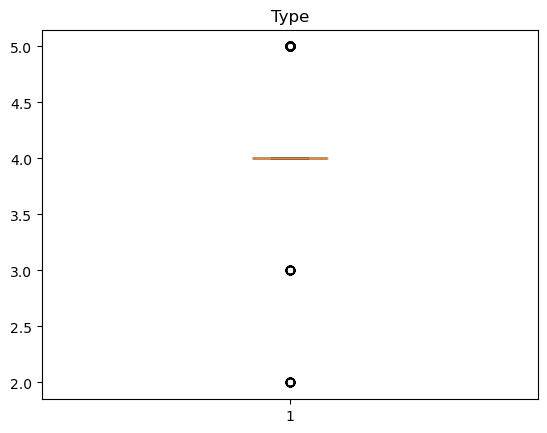

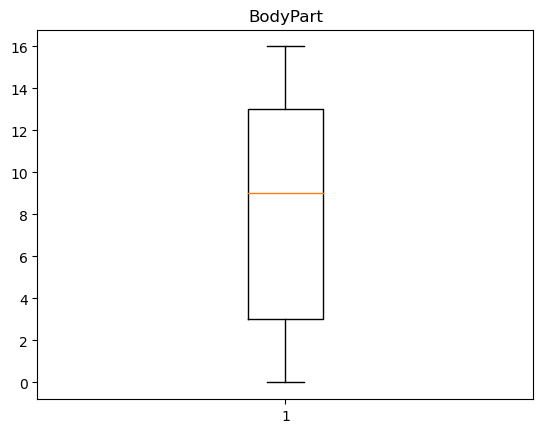

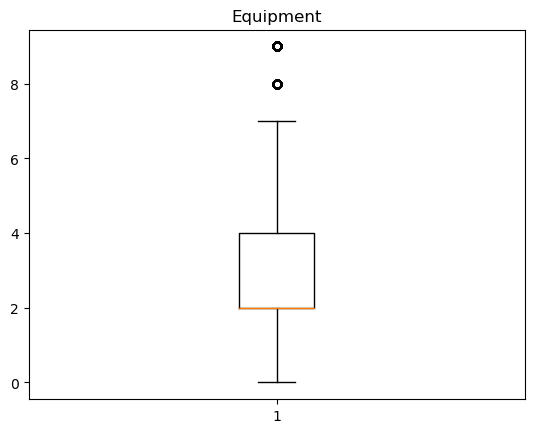

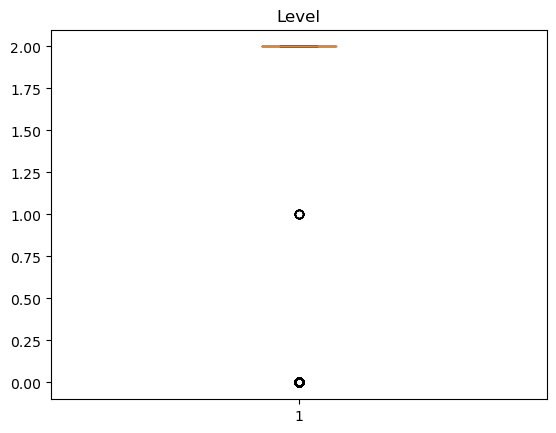

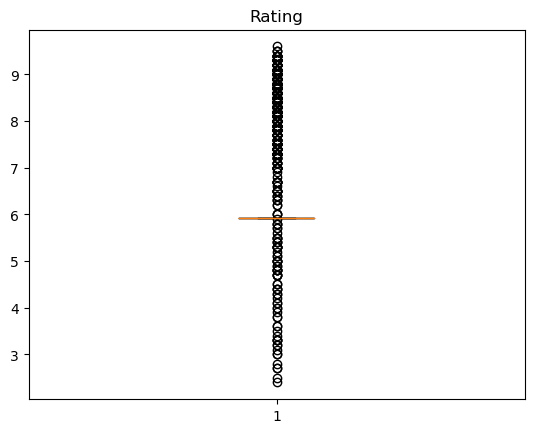

In [44]:
dataCheck = df.describe()

for i in dataCheck.columns:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

<Axes: >

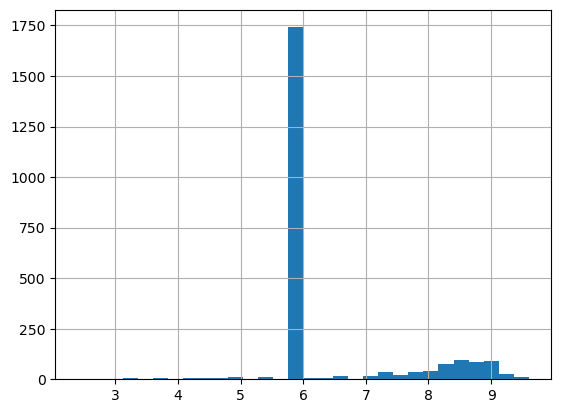

In [45]:
df['Rating'].hist(bins=30)

Данные распределенны не равномерно наблюдается дисбаланс

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop(['Rating'], axis=1) # Всё кроме целевой переменной
y = df['Rating'] # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Разбиение на наборы

In [47]:
y.value_counts(normalize=True)

Rating
5.91969    0.732911
8.80000    0.018987
8.30000    0.018143
8.70000    0.016878
9.00000    0.015612
             ...   
6.60000    0.000422
3.90000    0.000422
3.10000    0.000422
3.50000    0.000422
5.90000    0.000422
Name: proportion, Length: 69, dtype: float64

In [48]:
y_train.value_counts(normalize=True)

Rating
5.91969    0.729430
8.70000    0.018460
8.80000    0.018460
8.30000    0.017405
8.20000    0.015823
             ...   
6.80000    0.000527
2.80000    0.000527
3.10000    0.000527
5.60000    0.000527
3.40000    0.000527
Name: proportion, Length: 68, dtype: float64

In [49]:
y_test.value_counts(normalize=True)

Rating
5.91969    0.746835
8.40000    0.021097
9.00000    0.021097
8.30000    0.021097
8.80000    0.021097
8.50000    0.016878
8.00000    0.016878
8.60000    0.014768
9.10000    0.010549
8.70000    0.010549
8.90000    0.008439
7.00000    0.008439
7.30000    0.008439
7.40000    0.006329
7.50000    0.006329
9.40000    0.004219
7.20000    0.004219
8.10000    0.004219
8.20000    0.004219
7.90000    0.004219
7.80000    0.004219
5.50000    0.004219
9.20000    0.004219
4.80000    0.004219
3.30000    0.002110
5.00000    0.002110
5.40000    0.002110
6.70000    0.002110
9.50000    0.002110
5.70000    0.002110
9.60000    0.002110
7.70000    0.002110
3.80000    0.002110
3.60000    0.002110
7.60000    0.002110
Name: proportion, dtype: float64

In [50]:
from sklearn import metrics
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_metrics(y_test, y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

In [51]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [52]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

# Делаем предсказания на тестовом наборе
y_pred = model.predict(X_test)

print_metrics(y_test, y_pred)

MAE: 967.2817281634881
RMSE: 2187.898908014131
R2: 0.3502902739944197
MAPE: 7.065382069143561


In [53]:
from sklearn.neighbors import KNeighborsRegressor

# Создаем модель KNN
knn_model = KNeighborsRegressor(n_neighbors=5)

# Обучаем модель на тренировочных данных
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print_metrics(y_test, y_pred)

MAE: 1155.0740852251026
RMSE: 2432.287731851815
R2: 0.07939184039207736
MAPE: 9.414022454610759


In [54]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке
y_pred = model_regression.predict(X_test)

print_metrics(y_test, y_pred)

MAE: 1082.9325770373584
RMSE: 2423.8240861701574
R2: 0.2940198967601445
MAPE: 8.913834315053485


In [55]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)
print('Лучшее значение параметра:', lasso_cv.alpha_)

# Сделали прогнозы
y_pred = lasso_cv.predict(X_test)

print_metrics(y_test,y_pred)

Лучшее значение параметра: 0.08658977250322154
MAE: 1117.9722661978847
RMSE: 2434.9339321321495
R2: 0.22489301497957936
MAPE: 9.727045836615515
